In [23]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
cd "/content/gdrive/My Drive/sujoy data"

/content/gdrive/My Drive/sujoy data


In [25]:
!pwd

/content/gdrive/My Drive/sujoy data


In [26]:
!pip install face_recognition

In [27]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [28]:
unknown_faces_dir = "unknown_faces"
known_faces_dir = "known_faces"
tolerance = 0.6
frame_thickness = 3
font_thickness = 1
model = "cnn"

Loading known faces
Getting unknown faces
unk1.jpg
match found: LM10
match found: CR7


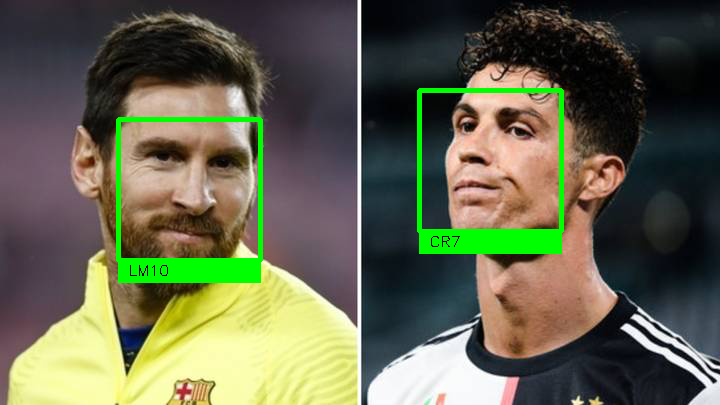

unk2.jpg
match found: CR7


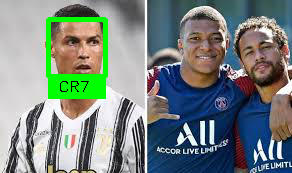

unk3.jpg
match found: LM10
match found: CR7


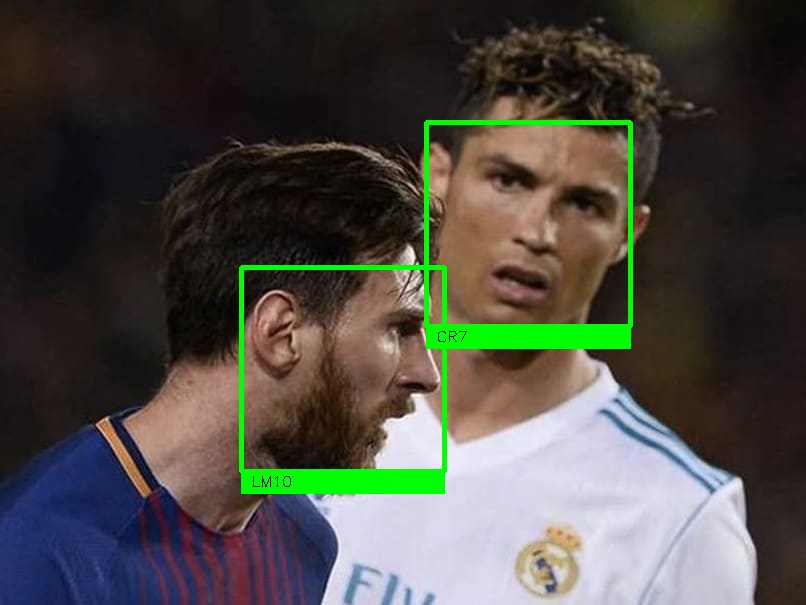

unk4.jpg
match found: CR7
match found: CR7


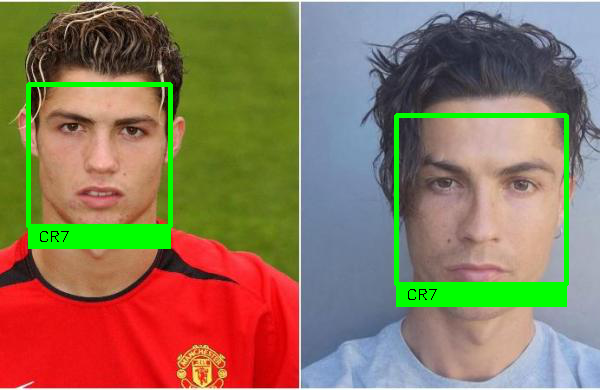

unk5.jpg
match found: CR7


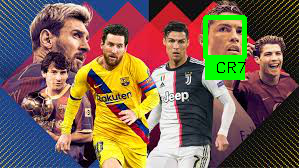

In [29]:
from google.colab.patches import cv2_imshow
print("Loading known faces")

# A list that will contain the known face encodings
known_faces = []

# A list that will contain the name of the known faces corresponding to the encodings
known_names = []

# Loop through each of the known images
for name in os.listdir(known_faces_dir):
  for filename in os.listdir(f"{known_faces_dir}/{name}"):
    # Get a known image
    image = face_recognition.load_image_file(f"{known_faces_dir}/{name}/{filename}")
    # Get the face encoding
    encoding = face_recognition.face_encodings(image)[0]
    known_faces.append(encoding)
    known_names.append(name)

print("Getting unknown faces")
# Loop through each of the uknown images
for filename in os.listdir(unknown_faces_dir):
  print(filename)
  # Get an unknown image
  image = face_recognition.load_image_file(f"{unknown_faces_dir}/{filename}")
  # Get the location/locations of the face/faces
  locations = face_recognition.face_locations(image, model=model)
  # Get the encoding
  encodings = face_recognition.face_encodings(image, locations)
  # COnvert the image from RGB to BGR for processing in open cv
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  # Loop through each encoding and location
  for face_encoding, face_location in zip(encodings, locations):
    # results is a list of boolean values having True for each match of the unknown face encoding with a known face encoding and False elsewhere
    results = face_recognition.compare_faces(known_faces, face_encoding, tolerance)
    match = None
    # If match is found
    if True in results:
      # Get the index of the encoding which has been matched
      match = known_names[results.index(True)]
      print(f"match found: {match}")

      # Extract the locations necessary to create rectangles on faces
      top_left = (face_location[3], face_location[0])
      bottom_right = (face_location[1], face_location[2])
      color = [0, 255, 0]
      cv2.rectangle(image, top_left, bottom_right, color, frame_thickness)

      # Extract the locations necessary to create a bottom text area to display the name of the person in the unknown image
      top_left = (face_location[3], face_location[2])
      bottom_right = (face_location[1], face_location[2] + 22)
      cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
      cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), font_thickness)
  cv2_imshow(image)
  cv2.waitKey(0)
 